In [1]:
from lsh import *
from utils import *
from query import *

%load_ext autoreload
%autoreload 2

# 1. Dataset

In [2]:
PATH_IMGS     = "imnet-val/val/"
FILE_FEATURES = "imnet-val/cnn-50000.p"
FNAME_OFFSET  = 48 #prefix of stored file names to chop off
IMSIZE        = (224, 224)

data = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)

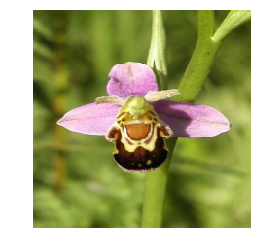

In [3]:
data.plt_img(32)

In [4]:
PATH_IMGS     = "imnet-test-1000/imgs/"
FILE_FEATURES = "imnet-test-1000/cnn-1000.p"
FNAME_OFFSET  = 23 #prefix of stored file names to chop off
IMSIZE        = (224, 224)
queries = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)


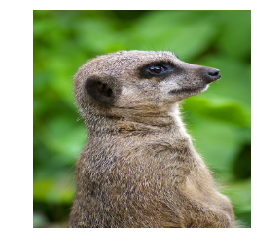

In [5]:
q_index = 11
q = queries.get_features(q_index)
queries.plt_img(q_index)

# 2. LSH

In [6]:
b = 200 #hash bits
M = 30  #number of permutations

query_obj = query(data=data, queries_dataset=queries, hash_bits=b, 
                  permutations=M)

# 3. Stuff to do with a single query, q

In [7]:
L = 4   #number of neighbors to make candidates
k = 10  #top-k nearest neighbors

query_obj.query_idx(q_index,N_neighbor_candidates=L, k_report=k)
query_obj.get_distances()
query_obj.ndcg_analysis()


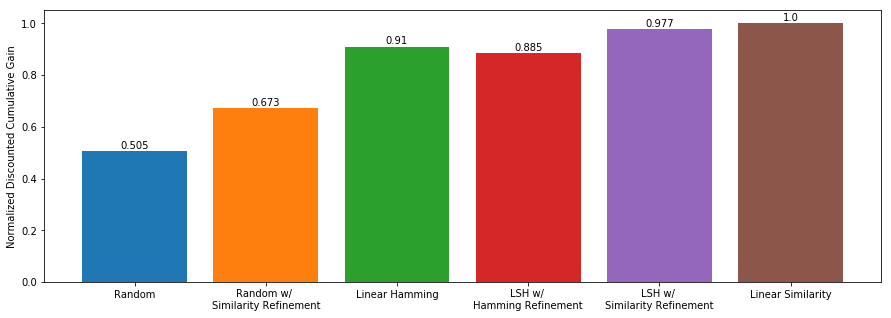

In [8]:
query_obj.ndgc_plot()


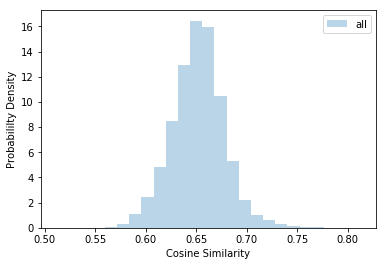

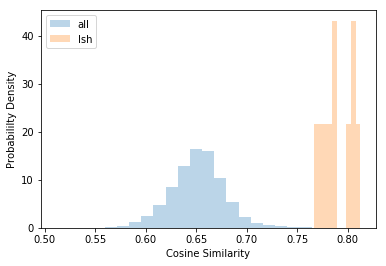

In [9]:
query_obj.histograms()

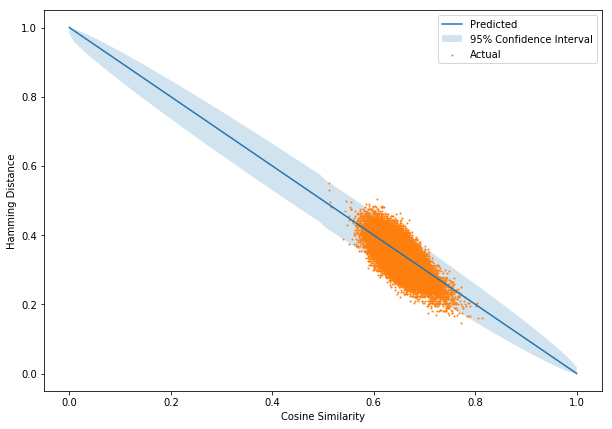

In [10]:
query_obj.sim_vs_ham()

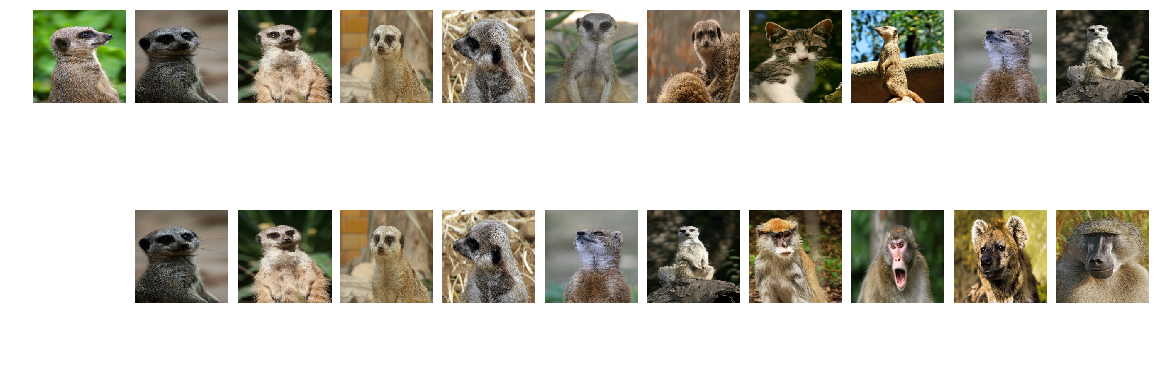

In [11]:
query_obj.plot()

In [12]:
%%timeit
query_obj.approx_top_k("hamming")

2.19 ms ± 609 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
query_obj.approx_top_k("innerprod")

1.73 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
query_obj.exact_top_k()

26.4 ms ± 619 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


---